# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [63]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('/data/condemn.txt')
condemnations.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

In [64]:
#examine columns in dataframe
condemnations.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [65]:
#examine dates in dataframe
condemnations['InspectDate'].value_counts()

2013-06-27 23:34:00    66
2013-06-27 23:29:00    63
2013-06-27 23:28:00    58
2013-06-27 23:27:00    57
2013-06-27 23:23:00    56
                       ..
2017-08-23 11:22:00     1
2018-01-04 17:32:00     1
2008-12-30 00:00:00     1
1992-08-07 00:00:00     1
2013-08-12 08:25:00     1
Name: InspectDate, Length: 9345, dtype: int64

In [66]:
#create filter for inspection dates in or after 1986
condemn_1986 = condemnations['InspectDate'] >=  '1986'

In [67]:
#create filter for inspection dates before 2015
condemn_2014= condemnations['InspectDate']  <  '2015'

In [68]:
#create new dataframe with dates only between 1986-2014
condemnations = condemnations[condemn_1986 & condemn_2014]

In [129]:
#verify that dates only include those in filter
condemnations['InspectDate'].value_counts()

2013-06-27 23:34:00    66
2013-06-27 23:29:00    63
2013-06-27 23:28:00    58
2013-06-27 23:27:00    57
2013-06-27 23:30:00    56
                       ..
1991-06-18 00:00:00     1
1999-05-09 00:00:00     1
1995-10-11 00:00:00     1
2014-04-24 19:27:00     1
1993-02-22 00:00:00     1
Name: InspectDate, Length: 7051, dtype: int64

In [70]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [74]:
#create a Year variable to use as index in pivot table
condemnations['Year'] = condemnations['InspectDate'].str[0:4]

In [87]:
import numpy as np

by_year = condemnations.pivot_table(
    values = 'AcctNum',
    index ='Year',
    columns = 'Status',
    aggfunc = np.ma.count,
    fill_value=0)

In [88]:
#inspect new dataframe
by_year

Status,B,L,R,W
Year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [89]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


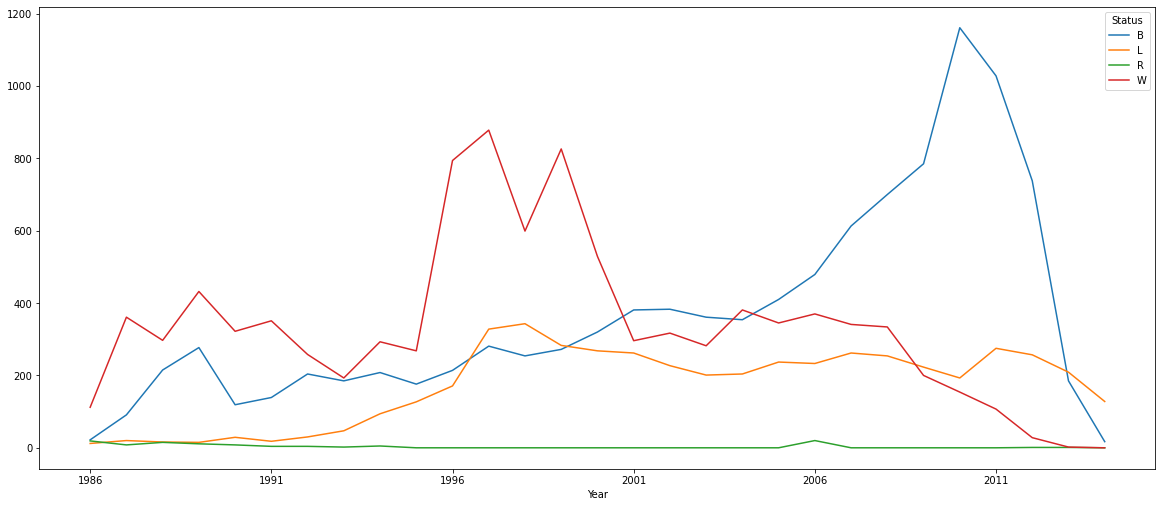

In [91]:
%matplotlib inline
by_year.plot(figsize=(20,8.5))

---

It's clear the most common status type of condemnations have changed over time.  There was a large increase in status B from about 2007 to 2013, whereas status W had more from aroun 1995 to 2000.  Status L had almost none until about 1997 and has remained stable since then.  There are rarely ever any condemnations in status R.  The changes in the number by status may reflect changes in city protocols or staffing during those specific times. 

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [92]:
import pandas as pd
meetings = pd.read_csv('/data/meetings.csv')
meetings.shape

In [96]:
meetings.head()

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [120]:
meetings.columns

Index(['meeting_uuid', 'meetingTitle', 'meetingId', 'userName', 'user_id',
       'user_tags', 'endTime', 'startTime', 'email', 'participantSeconds',
       'joinDate', 'joinWeek', 'joinMonth', 'participants',
       'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created',
       'smart_meeting', 'transcription_used',
       'total_transcription_duration_minutes', 'startDate', 'TIMEFRAME'],
      dtype='object')

In [98]:
#create new startDate variable
meetings['startDate'] = meetings['startTime'].str[0:10]

In [99]:
meetings.head()

In [104]:
#inspect new startDate variable
meetings['startDate'].value_counts()

2020-03-23    42
2020-03-26    34
2020-02-18    33
2020-03-24    32
2020-03-30    30
              ..
2020-02-09     1
2020-02-23     1
2020-01-25     1
2020-03-22     1
2020-01-18     1
Name: startDate, Length: 72, dtype: int64

In [109]:
#create function to create new timeframe variable of before and after based on startDate
def f(row):
    if row['startDate'] == '2020-02-17' or row['startDate'] == '2020-02-18' or row['startDate'] == '2020-02-19' or row['startDate'] == '2020-02-20' or row['startDate'] == '2020-02-21'  or row['startDate'] == '2020-02-22' or row['startDate'] == '2020-02-23' or row['startDate'] == '2020-02-24' or row['startDate'] == '2020-02-25' or row['startDate'] == '2020-02-26' or row['startDate'] == '2020-02-27' or row['startDate'] == '2020-02-28':
        val ='BEFORE'
    elif row['startDate'] == '2020-03-16' or row['startDate'] == '2020-03-17' or row['startDate'] == '2020-03-18' or row['startDate'] == '2020-03-19'or row['startDate'] == '2020-03-20'  or row['startDate'] == '2020-03-21' or row['startDate'] == '2020-03-22' or row['startDate'] == '2020-03-23' or row['startDate'] == '2020-03-24' or row['startDate'] == '2020-03-25' or row['startDate'] == '2020-03-26' or row['startDate'] == '2020-03-27':
        val = 'DURING' 
    else:
        val = "exclude"
    return val

In [110]:
#create new TIMEFRAME varialbe to flag if date was before or during timeframe of interest
meetings['TIMEFRAME'] = meetings.apply(f, axis = 1)

In [131]:
meetings['TIMEFRAME'].value_counts()

DURING    278
BEFORE    179
Name: TIMEFRAME, dtype: int64

In [114]:
meeting_before= meetings['TIMEFRAME'] == 'BEFORE'

In [115]:
meeting_during= meetings['TIMEFRAME'] == 'DURING'

In [117]:
#create dateframe to only inlude dates before or during timeframe in scope
meetings = meetings[meeting_before | meeting_during]

In [123]:
import numpy as np

summary = meetings.pivot_table(
    values = 'participantSeconds',
    index = 'userName',
    columns = 'TIMEFRAME',
    aggfunc = np.ma.count,
    fill_value=0)

In [124]:
summary

TIMEFRAME,BEFORE,DURING
userName,,
Drew.Marco,12,19
amit.bhagat,17,30
andrea.bryant.amitechsolutions,5,3
angie.warren,5,9
chris.rogers.amitechsolutions,4,3
eric.keeney,15,27
eric.rodman,4,12
jeff.hatfield.amitechsolutions,13,26
jennifer.patton.amitechs,5,7


---

In [126]:
#create pctChange variable
summary['pctChange'] = (summary['DURING'] - summary['BEFORE'])/summary['BEFORE']

In [127]:
summary

TIMEFRAME,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000
eric.keeney,15,27,0.800000
eric.rodman,4,12,2.000000
jeff.hatfield.amitechsolutions,13,26,1.000000
jennifer.patton.amitechs,5,7,0.400000


assert(len(summary) == 22)

In [128]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [130]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week12_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 70327e4] Submitting the week 12 programming assignment
 2 files changed, 1655 insertions(+), 10 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 67.56 KiB | 9.65 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:msimkins7/hds5210-2022.git
   6a5b87d..70327e4  main -> main
